<a href="https://colab.research.google.com/github/PaolaGAPI/Analyze-audio-signals-to-determine-the-music-Genre/blob/main/CNN_for_Music_Genre_Classification_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CNN Model for Music Genre Classification:

Una red neuronal convolucional (ConvNet/CNN) es un algoritmo de aprendizaje profundo que puede tomar una imagen de entrada, asignar importancia (pesos) a varias características en la imagen y poder diferenciar una de otra. CNN trabaja con convolución y agrupación en secuencia alterna en la red neuronal. Entonces, ¿por qué usar CNN en la clasificación de géneros? CNN, como se discutió antes, está especializado en el reconocimiento de características de imagen, asi pues como mencionamos anteriormente el espectrograma que representa el MFCC junto con el tiempo y la frecuencia será la entrada del modelo CNN.


En primer lugar, importamos algunas bibliotecas necesarias. Librosa es un paquete útil para manejar archivos de audio en Python, ya que proporciona no solo E/S, sino también varias transformaciones y extracción de características de audio, incluido MFCC.

librerias usadas:

librosa, librosa.display
matplotlib
numpy
os
math
json


In [4]:
!pip install librosa
!pip install tensorflow
!pip install keras
!pip install sklearn
!pip install scipy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=efe3db644517a157befeb91b979d60b8f06835829cfad5a56efde5fa4be461e3
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import json
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import os
import matplotlib.pyplot as plt
import random
import librosa
import math
import matplotlib


## The Dataset - GTZAN

- Instancias (m): 1.000
- Duración de la secuencia (por instancia): 30 segundos
- Etiquetas: 10 (Blues, Clásica, Country, Disco, Hip hop, Jazz, Metal, Pop, Reggae, Rock)

Preparación del conjunto de datos.

### Pasos
1. Crea el conjunto de datos
2. Ajuste la CNN al conjunto de datos
3. Evaluar el desempeño
4. Test Canciones mp3

### Creando el conjunto de datos
Según los diferentes recursos que encuentro en línea (Kaggle y algunas publicaciones de blog), parece que el camino a seguir es extraer características significativas de los datos, darles forma para que compartan dimensiones y construir un tensor a partir de ellos.
La característica más interesante fue el Mel-Spectogram

  

## 1. Crear el Conjunto de Datos

# Loading Datasets: 
Con los datos dados por el dataset GTZAN vamos a crear un archivo .json que contenga los MFCC del conjunto de datos de música y los guarda en el archivo junto con las etiquetas de género.

In [6]:
 # agregar la ruta donde tenga guardado la data de bases de gtzan
 
DATASET_PATH = "/content/drive/MyDrive/Universidad/AI/Final Project/Data/genres_original"
JSON_PATH = "data_10.json"
SAMPLE_RATE = 22050
TRACK_DURATION = 30 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION

def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
    """Extrae los MFCC del conjunto de datos de música y los guarda en un archivo json junto con las etiquetas de género.
        """

    # diccionario para almacenar mapas, etiquetas y MFCC
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    # recorrer todas las subcarpetas de género
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # asegurarnos de que estamos procesando un nivel de subcarpeta de género
        if dirpath is not dataset_path:

            # guardar la etiqueta de género (es decir, el nombre de la subcarpeta) en la asignación
            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))

            # procesar todos los archivos de audio en el subdirectorio de género
            for f in filenames:

		# cargar archivo de audio
                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

                # procesar todos los segmentos del archivo de audio
                for d in range(num_segments):

                    # calcular la muestra de inicio y fin para el segmento actual
                    start = samples_per_segment * d
                    finish = start + samples_per_segment

                   # extraer mfcc
                    mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                    mfcc = mfcc.T

                    # almacenar solo la función mfcc con el número esperado de vectores
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)
                        print("{}, segment:{}".format(file_path, d+1))

   # guardar MFCC en un archivo json
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)

In [7]:
# save_mfcc(DATASET_PATH, JSON_PATH, num_segments=10)

Se han truncado las últimas 5000 líneas del flujo de salida.

Processing: metal
/content/drive/MyDrive/Universidad/AI/Final Project/Data/genres_original/metal/metal.00000.wav, segment:1
/content/drive/MyDrive/Universidad/AI/Final Project/Data/genres_original/metal/metal.00000.wav, segment:2
/content/drive/MyDrive/Universidad/AI/Final Project/Data/genres_original/metal/metal.00000.wav, segment:3
/content/drive/MyDrive/Universidad/AI/Final Project/Data/genres_original/metal/metal.00000.wav, segment:4
/content/drive/MyDrive/Universidad/AI/Final Project/Data/genres_original/metal/metal.00000.wav, segment:5
/content/drive/MyDrive/Universidad/AI/Final Project/Data/genres_original/metal/metal.00000.wav, segment:6
/content/drive/MyDrive/Universidad/AI/Final Project/Data/genres_original/metal/metal.00000.wav, segment:7
/content/drive/MyDrive/Universidad/AI/Final Project/Data/genres_original/metal/metal.00000.wav, segment:8
/content/drive/MyDrive/Universidad/AI/Final Project/Data/genres_original

El proceso de creacion del archivo toma mas de 5 minutos, asi que por comodidad ya se otorga el archivo .json al usuario con las etiquetas de generos y los segmentos, el archivo .json contiene con datos numericos del MFCC de las canciones de la base de datos de GTZAN.

In [8]:
# ruta a json
DATA_PATH = "/content/Data CNN/data_10.json"

convertimos las listas en matrices numpy con los datos de las canciones.

In [9]:
def load_data(data_path):

    with open(data_path, "r") as f:
        data = json.load(f)

    # convertir listas en matrices numpy
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data succesfully loaded!")

    return  X, y

In [10]:
# Cargar datos
X, y = load_data(DATA_PATH)

Data succesfully loaded!


In [11]:
# crear entreno, validación y división de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

# agregar un eje a los conjuntos de entrada
X_train = X_train[..., np.newaxis]
X_validation = X_validation[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [12]:
X_train.shape


(5991, 130, 13, 1)

In [13]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)

In [14]:
# construimos la CNN
model_cnn = keras.Sequential()

# 1st conv layer
model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# 2nd conv layer
model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# 3rd conv layer
model_cnn.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
model_cnn.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# aplanar la salida y alimentarla en una capa densa
model_cnn.add(keras.layers.Flatten())
model_cnn.add(keras.layers.Dense(64, activation='relu'))
model_cnn.add(keras.layers.Dropout(0.3))

# capa de salida
model_cnn.add(keras.layers.Dense(10, activation='softmax'))

In [15]:
# compilar modelo
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model_cnn.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 11, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 6, 32)        0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 64, 6, 32)        128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 4, 32)         9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 2, 32)        0         
 2D)                                                             
                                                        

In [18]:
# Entrenar el modelo con epochs = 50
 history = model_cnn.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=50)

Epoch 1/50
188/188 [==============================] - 21s 105ms/step - loss: 2.3504 - accuracy: 0.2350 - val_loss: 1.8786 - val_accuracy: 0.3578
Epoch 2/50
188/188 [==============================] - 17s 91ms/step - loss: 1.8798 - accuracy: 0.3589 - val_loss: 1.5994 - val_accuracy: 0.4446
Epoch 3/50
188/188 [==============================] - 14s 77ms/step - loss: 1.6646 - accuracy: 0.4153 - val_loss: 1.4621 - val_accuracy: 0.5007
Epoch 4/50
188/188 [==============================] - 21s 110ms/step - loss: 1.5468 - accuracy: 0.4533 - val_loss: 1.3790 - val_accuracy: 0.5367
Epoch 5/50
188/188 [==============================] - 16s 84ms/step - loss: 1.4548 - accuracy: 0.4876 - val_loss: 1.3395 - val_accuracy: 0.5414
Epoch 6/50
188/188 [==============================] - 15s 81ms/step - loss: 1.3958 - accuracy: 0.4986 - val_loss: 1.3019 - val_accuracy: 0.5454
Epoch 7/50
188/188 [==============================] - 15s 82ms/step - loss: 1.3249 - accuracy: 0.5260 - val_loss: 1.2344 - val_accurac

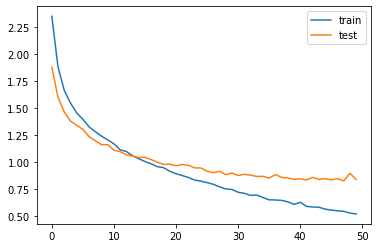

In [19]:
from matplotlib import pyplot 
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='test') 
pyplot.legend()
pyplot.show()

In [20]:
# evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model_cnn.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

79/79 - 1s - loss: 0.8306 - accuracy: 0.7101 - 1s/epoch - 18ms/step

Test accuracy: 0.7100520730018616


In [21]:
# Guardamos el modelo ya entrenado para uso mas adelante
model_cnn.save("Music_Genre_10_CNN")
model_cnn.save("Music_Genre_10_CNN.h5")

In [22]:
# Se puede usar para reconstruir el modelo de manera idéntica.
reconstructed_model = keras.models.load_model("Music_Genre_10_CNN.h5")

Ahora veamos que el epoch que es el numero de veces que se ejecutaran los algoritmos de forwardpropagation y backpropagation, no afectara en el accuracy del CNN. En cada ciclo (epoch) todos los datos de entrenamiento pasan por la red neuronal para que esta aprenda sobre ellos, si existen 10 ciclos y 1000 datos, cada ciclo los 1000 datos pasaran por la red neuronal. Esta comentado pues el tiempo que dura en realizar los epoch se demora la rededor de 9 minutos para los epoch de 50 y el de 80 20 minutos.

In [23]:
# Entrenar el modelo 2 con epochs = 80
history2 = model_cnn.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=80)

Epoch 1/80
188/188 [==============================] - 18s 95ms/step - loss: 0.5290 - accuracy: 0.8122 - val_loss: 0.8643 - val_accuracy: 0.7049
Epoch 2/80
188/188 [==============================] - 16s 86ms/step - loss: 0.4982 - accuracy: 0.8214 - val_loss: 0.8434 - val_accuracy: 0.7163
Epoch 3/80
188/188 [==============================] - 16s 88ms/step - loss: 0.4977 - accuracy: 0.8282 - val_loss: 0.8413 - val_accuracy: 0.7190
Epoch 4/80
188/188 [==============================] - 20s 104ms/step - loss: 0.4781 - accuracy: 0.8312 - val_loss: 0.8142 - val_accuracy: 0.7196
Epoch 5/80
188/188 [==============================] - 17s 90ms/step - loss: 0.4658 - accuracy: 0.8396 - val_loss: 0.8450 - val_accuracy: 0.7150
Epoch 6/80
188/188 [==============================] - 15s 81ms/step - loss: 0.4804 - accuracy: 0.8316 - val_loss: 0.8178 - val_accuracy: 0.7203
Epoch 7/80
188/188 [==============================] - 15s 77ms/step - loss: 0.4550 - accuracy: 0.8419 - val_loss: 0.8217 - val_accuracy

In [25]:
# evaluar el modelo en el conjunto de prueba
test_loss2, test_acc2 = model_cnn.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc2)

79/79 - 1s - loss: 1.0146 - accuracy: 0.7197 - 1s/epoch - 18ms/step

Test accuracy: 0.7196636199951172


Podemos ver que a pesar que los epoch son diferentes el accuracy no cambia mucho, de 71% a 72%, ahora bien los guardamos de igual forma estos modelos ya entrenados listos para utilizarse "Music_Genre_10_2_CNN" y "Music_Genre_10_CNN"


In [26]:
model_cnn.save("Music_Genre_10_2_CNN")
model_cnn.save("Music_Genre_10_2_CNN.h5")

In [28]:
# Se puede usar para reconstruir el modelo de manera idéntica.
reconstructed_model = keras.models.load_model("Music_Genre_10_2_CNN.h5")

## Prediction on Youtube Songs

Veamos unos ejemplos con canciones sacadas de youtube en su version mp3.

In [29]:
# Audio files pre-processing
def process_input(audio_file, track_duration):

  SAMPLE_RATE = 22050
  NUM_MFCC = 13
  N_FTT=2048
  HOP_LENGTH=512
  TRACK_DURATION = track_duration # measured in seconds
  SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION
  NUM_SEGMENTS = 10

  samples_per_segment = int(SAMPLES_PER_TRACK / NUM_SEGMENTS)
  num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / HOP_LENGTH)

  signal, sample_rate = librosa.load(audio_file, sr=SAMPLE_RATE)
  
  for d in range(10):

    # calculate start and finish sample for current segment
    start = samples_per_segment * d
    finish = start + samples_per_segment

    # extract mfcc
    mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=NUM_MFCC, n_fft=N_FTT, hop_length=HOP_LENGTH)
    mfcc = mfcc.T

    return mfcc

In [2]:
genre_dict = {0:"blues",1:"clasical",2:"country",3:"disco",4:"hiphop",5:"metal",6:"pop",7:"reggae",8:"rock",9:"jazz"}

In [88]:
new_input_mfcc = process_input("/content/Data CNN/cant make you love me.mp3", 30)

In [89]:
type(new_input_mfcc)

numpy.ndarray

In [90]:
new_input_mfcc.shape

(130, 13)

In [91]:
X_to_predict = new_input_mfcc[np.newaxis, ..., np.newaxis]
X_to_predict.shape

(1, 130, 13, 1)

In [92]:
prediction = model_cnn.predict(X_to_predict)

# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", genre_dict[int(predicted_index)])

1/1 [==============================] - 0s 18ms/step
Predicted Genre: pop


In [93]:
new_input_mfcc = process_input("/content/Data CNN/Is this love bob marley.mp3", 30)
X_to_predict = new_input_mfcc[np.newaxis, ..., np.newaxis]
X_to_predict.shape
new_input_mfcc.shape

(130, 13)

In [94]:
prediction = model_cnn.predict(X_to_predict)

# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", genre_dict[int(predicted_index)])

1/1 [==============================] - 0s 17ms/step
Predicted Genre: reggae


In [106]:
new_input_mfcc = process_input("/content/Data CNN/I will survive-Gloria Gaynor.mp3", 30)
X_to_predict = new_input_mfcc[np.newaxis, ..., np.newaxis]
X_to_predict.shape
new_input_mfcc.shape

(130, 13)

In [107]:
prediction = model_cnn.predict(X_to_predict)

# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", genre_dict[int(predicted_index)])

1/1 [==============================] - 0s 20ms/step
Predicted Genre: disco
